## Student Performance Tracker
### Life Cycle of Machine Learning Project
- Data Collection
- Data checks to peerform
- EDA
- Data Pre-Processing
- Model Training 
- Choose best model


### 1) Problem statement
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

### 2) Data Collection
Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

#### 2.1 Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

Import the CSV Data as Pandas DataFrame

In [5]:
df = pd.read_csv('data/stud.csv')


In [6]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## 2.2 Dataset information
- gender : sex of students -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B, C, D, E)
- parental level of education : parents' final education -> (bachelor's degree, some college, master's degree, associate's degree, high school)
- lunch : having lunch before test (`standard or free/reduced`)
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

## 3. Data Checks to perform
- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column


In [7]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

##### No missing values in the data set

In [8]:
df.duplicated().sum()

np.int64(0)

There is no duplicates in the data set

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Checking unique values in each column

In [10]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

#### quickly checking the basic statistic about the data set

In [11]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [12]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Exploring Data

In [13]:
print("Categories in 'gender' column:     ",end=' ' )
print(df['gender'].unique())
print("Categories in 'race_ethnicity' column:     ",end=' ' )
print(df['race_ethnicity'].unique())
print("Categories in 'parental_level_of_education' column:     ",end=' ' )
print(df['parental_level_of_education'].unique())
print("Categories in 'lunch' column:     ",end=' ' )
print(df['lunch'].unique())
print("Categories in 'test_preparation_course' column:     ",end=' ' )
print(df['test_preparation_course'].unique())

Categories in 'gender' column:      ['female' 'male']
Categories in 'race_ethnicity' column:      ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' column:      ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' column:      ['standard' 'free/reduced']
Categories in 'test_preparation_course' column:      ['none' 'completed']


In [14]:
# defining numerical and categorical columns
numerical_feature = [feature for feature in df.columns if df[feature].dtype != 'object']
categorical_features = [feature for feature in df.columns if df[feature].dtype =='object']

# printing these features
print('we have {} numerical features: {}'.format(len(numerical_feature),numerical_feature))
print('we have {} categorical features: {}'.format(len(categorical_features),categorical_features))

we have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
we have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


## Some sort of Feature Engineering

#### Adding columns for total score and average

In [15]:
df['total_score'] = df['math_score'] + df["reading_score"] + df['writing_score']
df["average"] = df[['math_score','reading_score',"writing_score"]].mean(axis=1)

In [16]:
reading_full = (df['reading_score']==100).sum()
writing_full = (df['writing_score']==100).sum()
math_full = (df['math_score']==100).sum()


print("No. of students with full marks in reading: {}".format(reading_full))
print("No. of students with full marks in writing: {}".format(writing_full))
print("No. of students with full marks in math: {}".format(math_full))

No. of students with full marks in reading: 17
No. of students with full marks in writing: 14
No. of students with full marks in math: 7


From above features, we can conclude that:
Best performance is in reading section

## Exploring Data (Visualization)

#### Visualizing average score distribution 
-Histogram
-Kernel Distbn Func

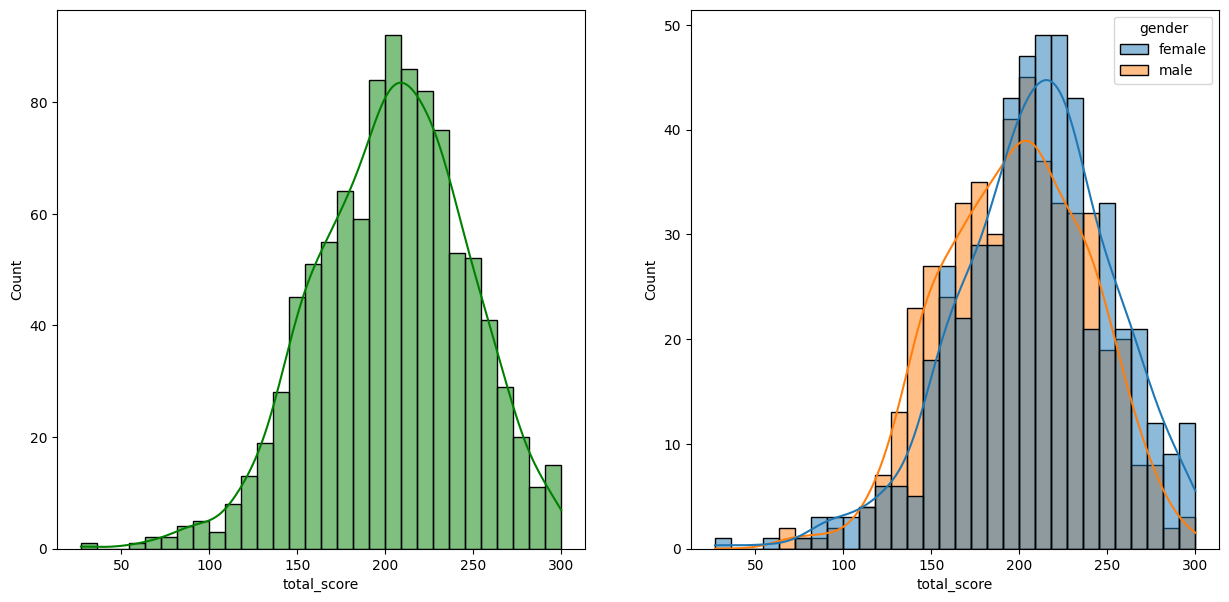

In [25]:
fig , ax = plt.subplots(nrows=1,ncols=2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='total_score', bins=30, kde=True,color='green')
plt.subplot(122)
sns.histplot(data=df, x='total_score',kde=True, hue="gender", bins=30)
plt.show()

### Insight:
##### Female students tend to perform well than male students

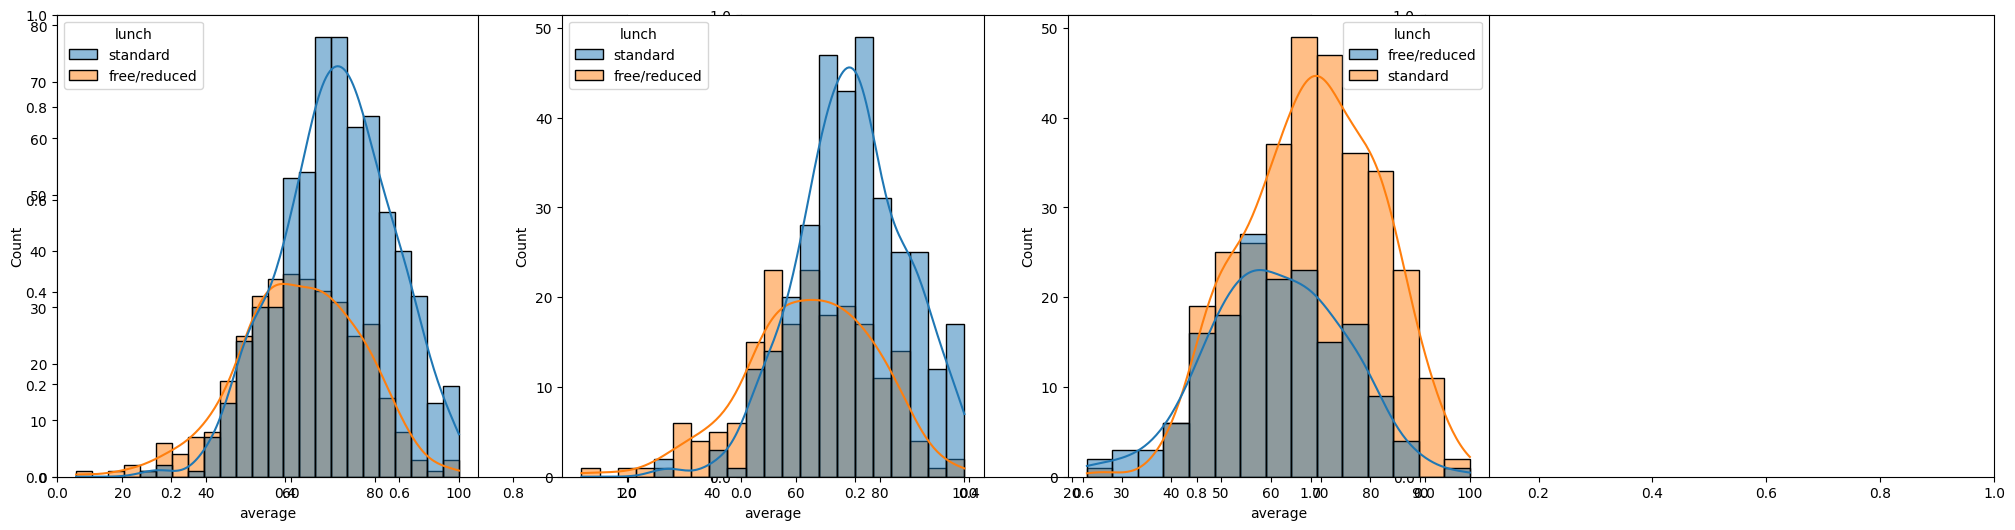

In [28]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

Insights

#### - Standard lunch helps perform well in exams to both male and female

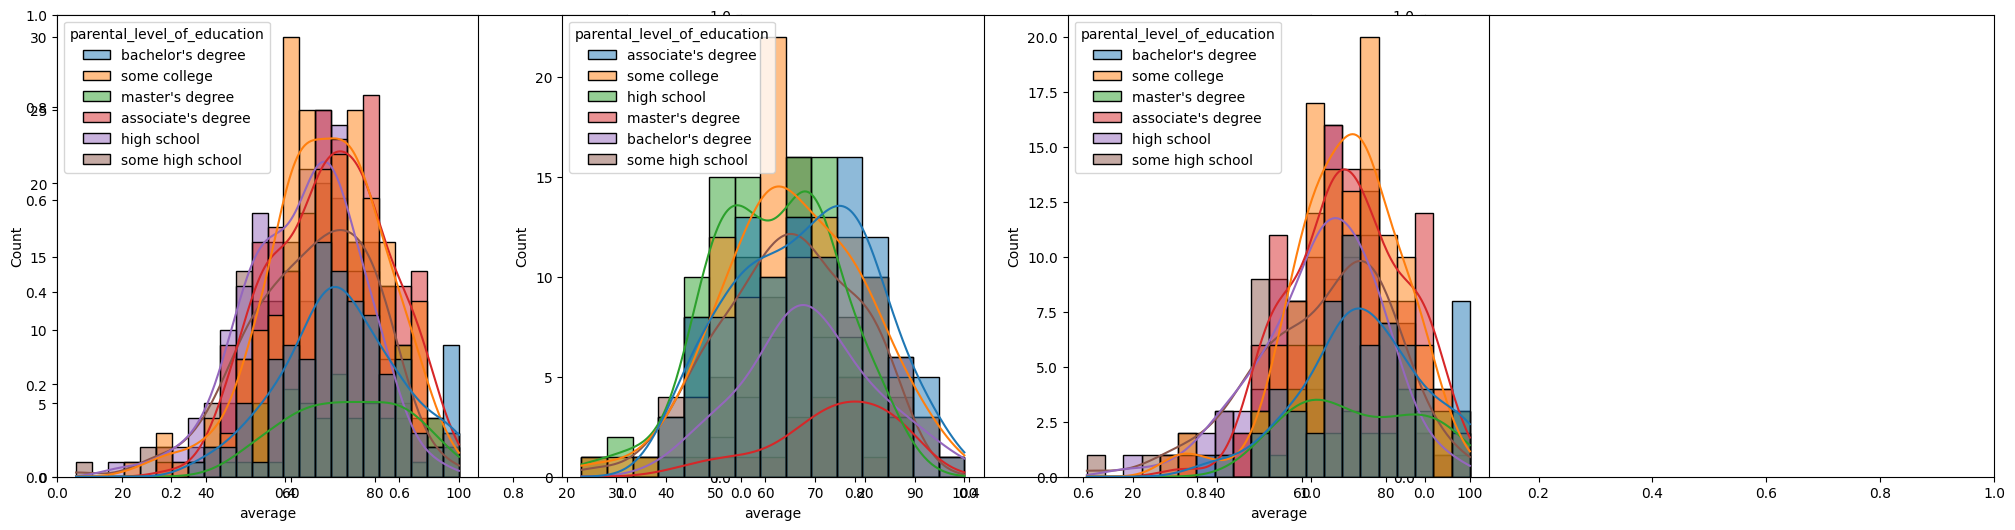

In [32]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

In [30]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
